**To run the models in cerebmodels the user must be in the root of `~/cerebmodels/`**

Since this notebook is in `~/cerebmodels/docs/notebooks/` the user must move up two directories

In [1]:
cd ..

/home/main-dev/cerebmodels/docs


In [2]:
cd ..

/home/main-dev/cerebmodels


# Model Execution:
# Case1- no stimulation, raw-mode (i.e. without evoking capability)

## 1. Set-up

### Import `ExecutiveControl` of cerebmodels

In [3]:
from executive import ExecutiveControl as ec

## 2. Search for models and pick a desired model

### 2.1. See available model scales

In [5]:
ec.list_modelscales()

['subcell', 'synapses', 'cells', 'microcircuits', 'layers']

### 2.2. See available models for a particular scale
Below shows the available models at the level of cellular modelling scale.

In [6]:
ec.list_models( modelscale = "cells" )

['PC2010Genet',
 'GoC2007Solinas',
 'GrC1994Gabbiani',
 'PC2009Akemann',
 'PC2013Marasco',
 'PC2006Akemann',
 'GoC2010Botta',
 'PC2001Miyasho',
 'PC2003Khaliq',
 'GoC2011Souza',
 'GrC2016Dover',
 'PC2018Zang',
 'PC1997aHausser',
 'PC2015Masoli',
 'PC2011Brown',
 'PC2015aForrest',
 'GrC2011Souza',
 'PC2015bForrest',
 'GrC2001DAngelo',
 'PC1997bHausser',
 'DCN2011Luthman',
 'GrC2009Diwakar']

### 2.3. Pick a desired model
Although it is not essential to instantiate `ExecutiveControl` to launch the model, it is recommended if one were to visualize the response.

In [ ]:
exc = ec()

In [9]:
%%capture
desired_model = exc.choose_model( modelscale = "cells", modelname = "PC2003Khaliq")

## 3. Launching (executing) the desired model
### 3.1. Setting the parameters
For our cases of launching the model without stimulation and without ``CerbUnit``'s capability, one is just required to define the run-time parameters.

In [11]:
runtimeparam = { "dt": 0.025, "celsius": 37, "tstop": 500, "v_init": -65 }

### 3.2. Executing the model

In [12]:
desired_model = exc.launch_model(parameters = runtimeparam, onmodel = desired_model )

--- 0.16233300000000028 seconds ---


### 3.3. Saving the response
In ``CerebUnit`` the model response are saved in an HDF5 file based on NWB:2.0 scheme. Execution of ``save_response()`` returns the filename and its path. Below, this return full path and filename is assigned to the attribute **``fullfilename``** of the model.

In [13]:
desired_model.fullfilename = exc.save_response()

/envs/py3-cerebmodels/lib/python3.5/site-packages/pynwb/file.py:619: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


## 4. Visualizing the response
### 4.1. List model regions of the chosen model
Before one calls the visualization function the user must define the the region of interest (roi) from which the response will be visualized.

In [14]:
exc.list_modelregions( chosenmodel = desired_model )

['soma v']

### 4.2. Visualize all events
The method ``visualize_all`` plots all the events in respective sub-plot. In our particular case with not stimulation the simulation has only one event therefore only one sub-plot is seen below.

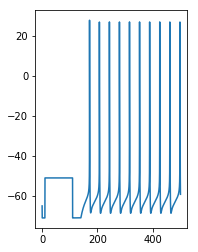

In [15]:
exc.visualize_all(chosenmodel = desired_model, roi="soma v")

### 4.3. Visualize all events in one plot

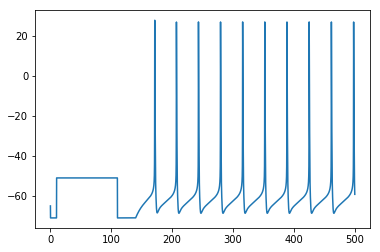

In [16]:
exc.visualize_aio(chosenmodel = desired_model, roi="soma v")